# UUZOP Projekt - 2. dio - bez težine bebe

In [1]:
import numpy as np
import pandas as pd

# za nedostajuće vrijednosti i labele
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

# vizualizacija
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

## Učitavanje podataka

In [2]:
# nedostajuće vrijednosti popunjene srednjom vrijednošću susjeda
df_average = pd.read_csv("CBWD_average.csv")

# nedostajuće vrijednosti popunjene s IterativeImputer
df_imputer = pd.read_csv("CBWD_imputer.csv")

# 1. Nedostajuće vrijednosti popunje srednjom vrijednošću susjeda

# Gaussian Naïve Bayes

In [3]:
oe = OrdinalEncoder(categories = [['L', 'N', 'H']])
df_average['LNH'] = oe.fit_transform(df_average[['LNH']])
df_imputer['LNH'] = oe.fit_transform(df_imputer[['LNH']])


X = df_average.loc[:, (df_average.columns != 'LNH') & (df_average.columns != 'BWt(kg)')]
y = df_average['LNH']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

# model
model = GaussianNB()

# treniranje modela
model.fit(X_train, y_train)

# predviđene vrijednosti
y_predict = model.predict(X_test)

### Točnost modela nad podacima za testiranje (u istraživanju je 86%)

$$Acc = {{TP + TN}\over {TP + TN + FP + FN}}$$

In [5]:
'Točnost: {:.1%}'.format(model.score(X_test, y_test))

'Točnost: 41.5%'

### Točnost modela nad podacima za treniranje (u istraživanju je 86%)
$$Acc = {{TP + TN}\over {TP + TN + FP + FN}}$$

In [6]:
'Točnost: {:.1%}'.format(model.score(X_train, y_train))

'Točnost: 40.5%'

In [7]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### Preciznost (u istraživanju je za L=0.64, a za N=0.91)

$$
P = {{TP}\over {TP + FP}}
$$

In [8]:
ps_L, ps_N =precision_score(y_test, y_predict, average = None, labels=[0.0, 1.0]) # L=0, N=1

print('L: %0.3f' %ps_L)
print('N: %0.3f' %ps_N)

L: 0.343
N: 0.892


### Odziv (u istraživanju je za L=0.64, a za N=0.91)

$$R = {{TP}\over {TP + FN}}$$


In [9]:
rs_L, rs_N = recall_score(y_test, y_predict, average = None, labels=[0.0, 1.0]) # L=0, N=1
print('L: %0.3f' %rs_L)
print('N: %0.3f' %rs_N)

L: 0.143
N: 0.453


### F1 (u istraživanju je za L=0.61, a za N=0.91)

$$F = {{2PR}\over {P + R}}$$


In [10]:
f1_L, f1_N = f1_score(y_test, y_predict, average = None, labels=[0.0, 1.0]) # L=0, N=1

print('L: %0.3f' %f1_L)
print('N: %0.3f' %f1_N)

L: 0.202
N: 0.601


### Matrica zabune

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, y_predict)

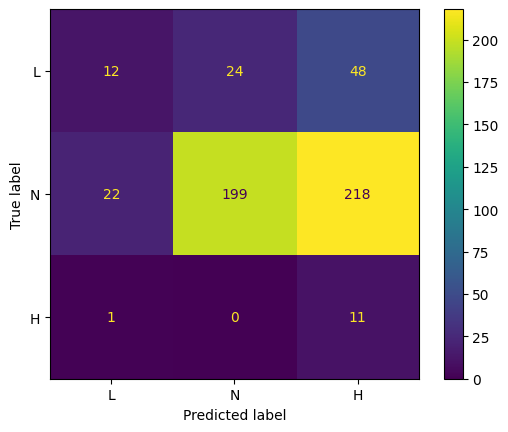

In [12]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['L', 'N', 'H'])

cm_display.plot()
plt.show()

### ROC krivulja

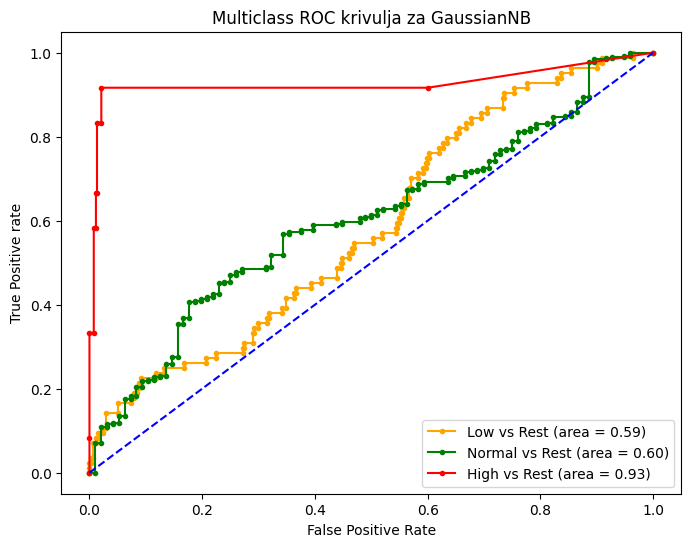

In [13]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

figure(figsize=(8, 6), dpi=100)
pred_prob = model.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}

n_class = 3

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='solid',color='orange',marker='.', label='Low vs Rest (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='solid',color='green',marker='.', label='Normal vs Rest (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], linestyle='solid',color='red',marker='.', label='High vs Rest (area = %0.2f)' % roc_auc[2])
plt.plot(p_fpr, p_tpr, linestyle='dashed',color='blue')
plt.title('Multiclass ROC krivulja za GaussianNB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.savefig('Multiclass ROC',dpi=800);   

# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
# model
model_r = RandomForestClassifier(n_estimators=80)
model_r.fit(X_train, y_train)

# predviđene vrijednosti
y_predict_r = model_r.predict(X_test)

### Točnost modela nad podacima za testiranje (u istraživanju 100%)
$$Acc = {{TP + TN}\over {TP + TN + FP + FN}}$$

In [16]:
'Točnost: {:.1%}'.format(model_r.score(X_test, y_test))

'Točnost: 88.2%'

### Točnost modela nad podacima za treniranje (u istraživanju 100%)
$$Acc = {{TP + TN}\over {TP + TN + FP + FN}}$$

In [17]:
'Točnost: {:.1%}'.format(model_r.score(X_train, y_train))

'Točnost: 100.0%'

### Preciznost (u istraživanju je za L=1, a za N=1)
$$
P = {{TP}\over {TP + FP}}
$$

In [18]:
ps_L_r, ps_N_r =precision_score(y_test, y_predict_r, average = None, labels=[0.0, 1.0]) # L=0, N=1

print('L: %0.3f' %ps_L_r)
print('N: %0.3f' %ps_N_r)

L: 0.938
N: 0.878


### Odziv (u istraživanju je za L=1, a za N=1)
$$R = {{TP}\over {TP + FN}}$$

In [19]:
rs_L_r, rs_N_r = recall_score(y_test, y_predict_r, average = None, labels=[0.0, 1.0]) # L=0, N=1
print('L: %0.3f' %rs_L_r)
print('N: %0.3f' %rs_N_r)

L: 0.357
N: 0.995


### F1 (u istraživanju je za L=1, a za N=1)
$$F = {{2PR}\over {P + R}}$$


In [20]:
f1_L_r, f1_N_r = f1_score(y_test, y_predict_r, average = None, labels=[0.0, 1.0]) # L=0, N=1

print('L: %0.3f' %f1_L_r)
print('N: %0.3f' %f1_N_r)

L: 0.517
N: 0.933


### Matrica zabune

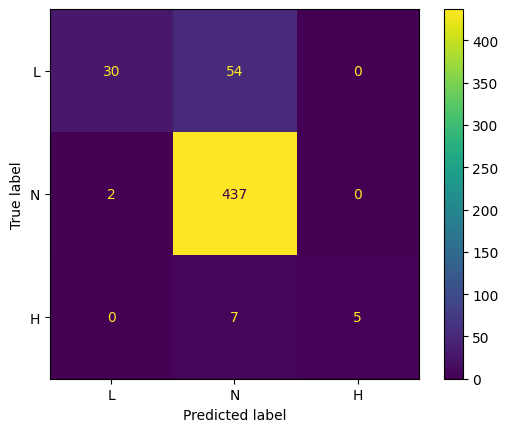

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix_r = confusion_matrix(y_test, y_predict_r)
cm_display_r = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_r, display_labels = ['L', 'N', 'H'])

cm_display_r.plot()
plt.show()


## ROC/AUC krivulja

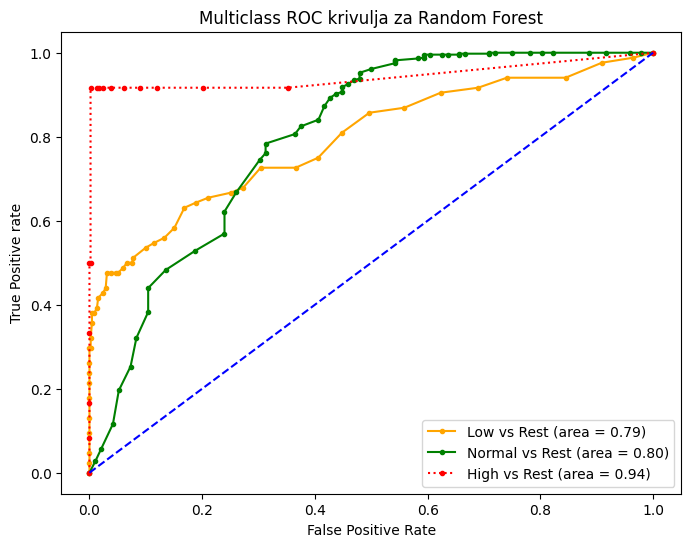

In [22]:
pred_prob = model_r.predict_proba(X_test)
figure(figsize=(8, 6), dpi=100)

fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 3

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='solid',color='orange', marker='.', label='Low vs Rest (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='solid',color='green',marker='.', label='Normal vs Rest (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], linestyle='dotted',color='red',marker='.', label='High vs Rest (area = %0.2f)' % roc_auc[2])
plt.plot(p_fpr, p_tpr, linestyle='dashed',color='blue')
plt.title('Multiclass ROC krivulja za Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=800); 

# Usporedba klasifikatora

## Matrice zabune

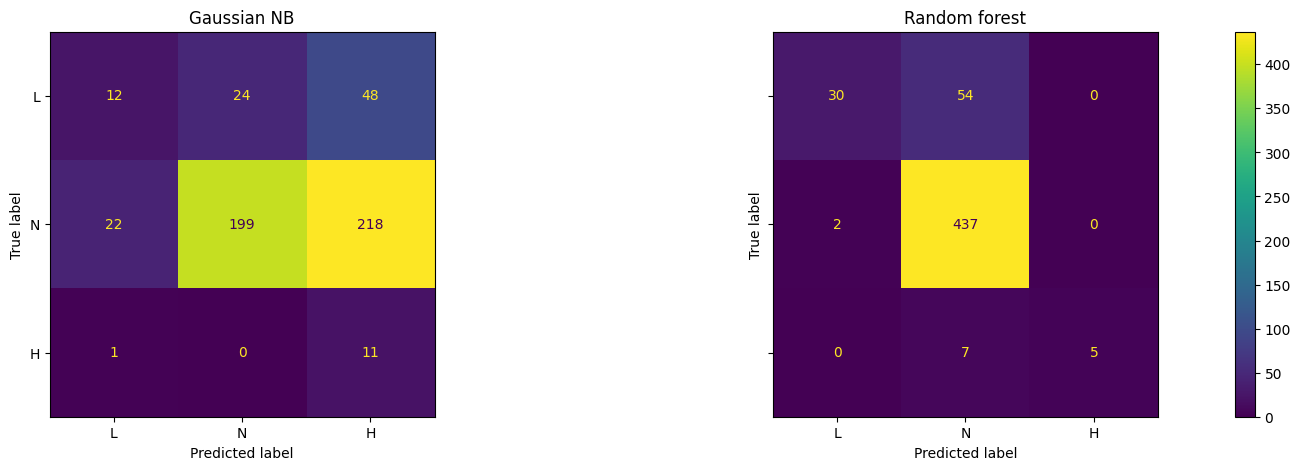

In [23]:
classifiers = {
    "Gaussian NB": model,
    "Random forest": model_r,
    
}

f, axes = plt.subplots(1, 2, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=['L', 'N', 'H'])
    disp.plot(ax=axes[i],)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
   
plt.subplots_adjust(wspace=0.40, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

## Usporedba ROC krivulja

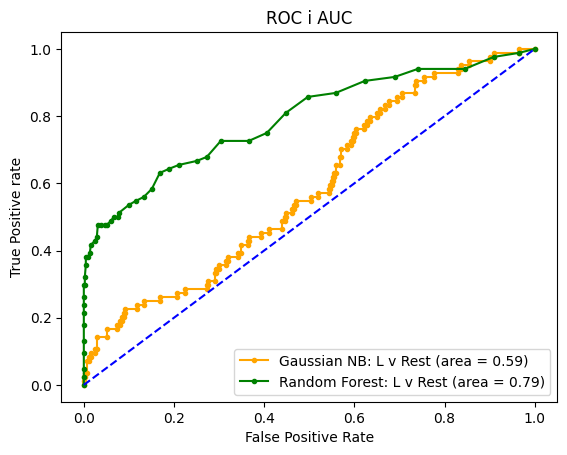

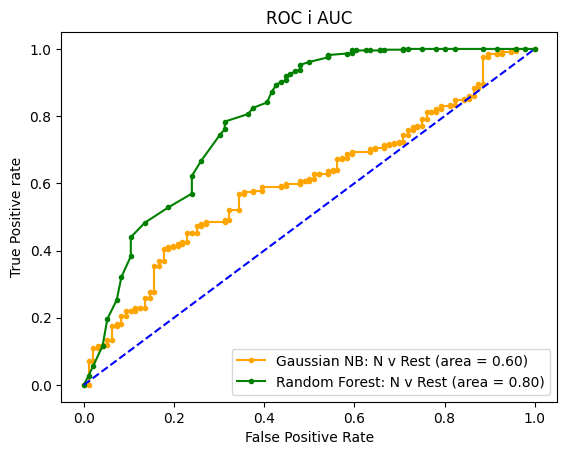

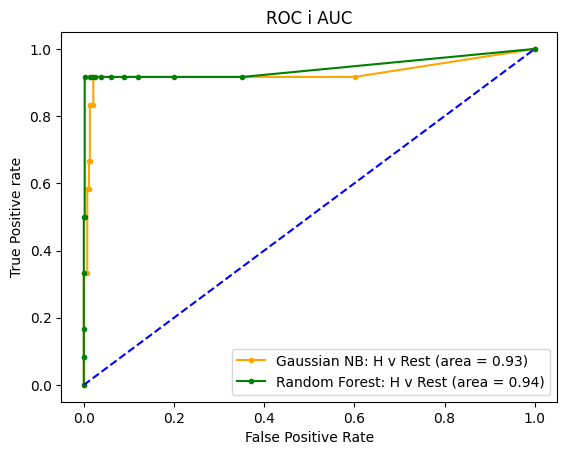

In [24]:
pred_prob_nb = model.predict_proba(X_test)
pred_prob_rf = model_r.predict_proba(X_test)


fpr = {}
tpr = {}
thresh ={}
roc_auc={}

fpr_rf = {}
tpr_rf = {}
thresh_rf ={}
roc_auc_rf={}

n_class = 3

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

labels = ['L', 'N', 'H']

# GaussianNB
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_nb[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Random forest    
for i in range(n_class):    
    fpr_rf[i], tpr_rf[i], thresh_rf[i] = roc_curve(y_test, pred_prob_rf[:,i], pos_label=i)
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])    
    
for i in range(n_class):
    #figure(figsize=(8, 6), dpi=100)
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='solid',color='orange', marker='.', label='Gaussian NB: %c v Rest (area = %0.2f)' % (labels[i], roc_auc[i]))
    plt.plot(fpr_rf[i], tpr_rf[i], linestyle='solid',color='green',marker='.', label='Random Forest: %c v Rest (area = %0.2f)'%(labels[i], roc_auc_rf[i]))
    #plt.plot(fpr[2], tpr[2], linestyle='dotted',color='red', label='High vs Rest (area = %0.2f)' % roc_auc[2])
    plt.plot(p_fpr, p_tpr, linestyle='dashed',color='blue')
    plt.title('ROC i AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.savefig('Multiclass ROC',dpi=800); 
    plt.show()

In [25]:
y_prob_nb = model.predict_proba(X_test)
y_prob_rf = model_r.predict_proba(X_test)

auc_score=[roc_auc_score(y_test,i, multi_class='ovr') for i in [y_prob_nb,y_prob_rf] ]



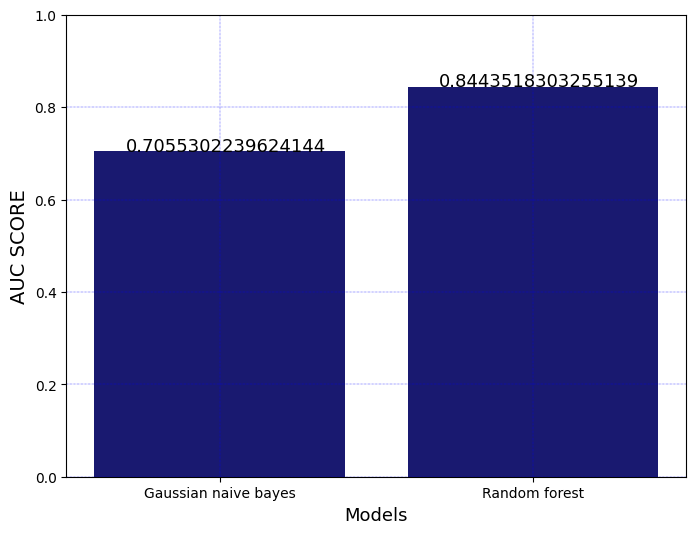

In [26]:
models = ['Gaussian naive bayes', 'Random forest']

plt.figure(figsize=(8,6))
plt.bar(models,auc_score,color='midnightblue',width=0.8)
plt.xlabel('Models',fontsize=13)
plt.ylabel('AUC SCORE',fontsize=14)
plt.ylim(top=1)
plt.ylim(bottom=0.0)
plt.grid(color='b',ls='-.',lw=0.25)

#for displaying the value above plot
plt.text(-.3,auc_score[0],str(auc_score[0]),fontsize=13)
plt.text(0.7,auc_score[1],str(auc_score[1]),fontsize=13)
plt.show()

## Zaključak
Možemo zaključiti da je Random Forest klasifikator bolji od Gaussian naivni bayes. 

----

# 2. Nedostajuće vrijednosti popunjene koristeći <code>IterativeImputer<code>

U ovom dijelu treniramo modele na drugim skupom podataka. U ovom skupu podataka, nedostajuće vrijednosti su popunjene koristeći <code>Iterative Imputer</code>, a ne srednjom vrijednošću susjeda.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

X = df_imputer.loc[:,( df_imputer.columns != 'LNH') & (df_imputer.columns != 'BWt(kg)')]
y = df_imputer['LNH']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)


## Gaussian Naive Bayes

In [28]:
# treniranje modela
model_nb_i = GaussianNB()
model_nb_i.fit(X_train, y_train)

# predviđene vrijednosti
y_predict_i = model_nb_i.predict(X_test)

### Točnost modela nad podacima za testiranje
Dolazi do malog poboljšanja, ali to također ovisi o podjeli skupova za testiranje i treniranje

In [29]:
'Točnost: {:.1%}'.format(model_nb_i.score(X_test, y_test))

'Točnost: 77.6%'

## Random forest

In [30]:
# treniranje modela
model_rf_i = RandomForestClassifier()
model_rf_i.fit(X_train, y_train)

RandomForestClassifier()

### Točnost modela nad podacima za testiranje
Rezultati su jednaki kao i kod prvog skupa podataka

In [31]:
'Točnost: {:.1%}'.format(model_rf_i.score(X_test, y_test))

'Točnost: 92.3%'

### Matrice zabune

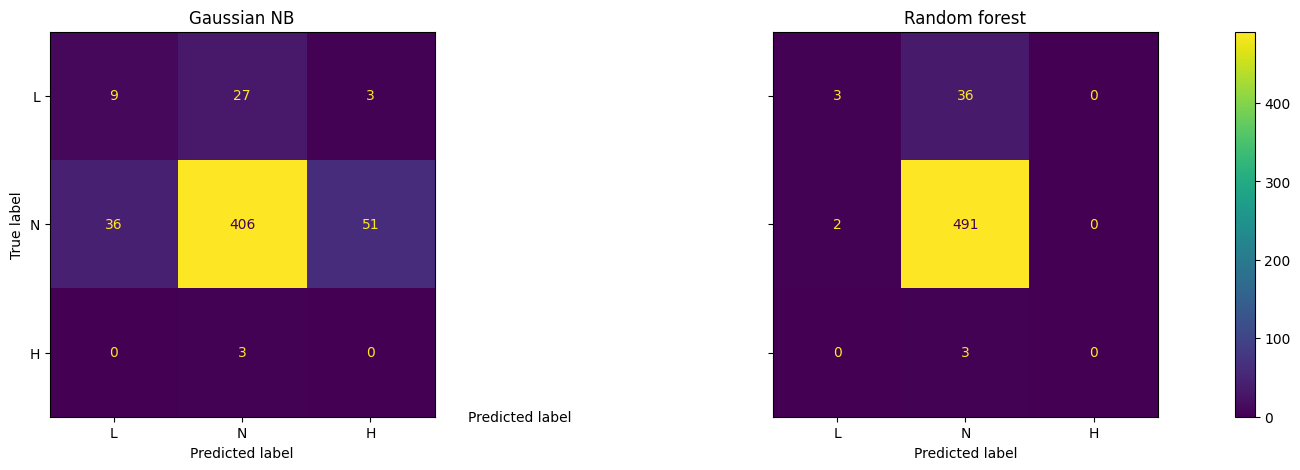

In [32]:
classifiers = {
    "Gaussian NB": model_nb_i,
    "Random forest": model_rf_i,
    
}

f, axes = plt.subplots(1, 2, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=['L', 'N', 'H'])
    disp.plot(ax=axes[i],)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    #disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()